In [10]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target
x_train, x_test=x[:60000],x[:60000]
y_train, y_test=y[:60000],y[:60000]


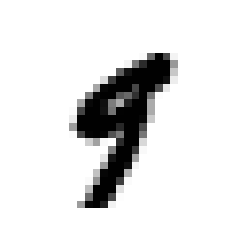

In [11]:
import matplotlib
import matplotlib.pyplot as plt
some_digit=x_train[36000]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [12]:
y_train[36000]

'9'

In [13]:
import numpy as np
shuffle_index=np.random.permutation(60000)
x_train, y_train=x_train[shuffle_index],y_train[shuffle_index]
y_train = y_train.astype(np.int8)



Binary classifier


In [14]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

Stochastic Gradient Descent

In [15]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_5)
sgd_clf.predict([some_digit])

array([False])

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.96785, 0.9577 , 0.90975])

Confusion matrix


In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[52681,  1898],
       [ 1396,  4025]])

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_5, y_train_pred)

0.6795542799257133

In [20]:
recall_score(y_train_5, y_train_pred)

0.7424829367275411

In [21]:
f1_score(y_train_5, y_train_pred)

0.7096262341325811

Multinomial classifier

In [25]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train,y_train)
ovo_clf.predict([some_digit])

array([4], dtype=int8)

In [27]:
len(ovo_clf.estimators_)

45

KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large, y_train_odd]
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_multilabel)
knn_clf.predict([some_digit])

array([[ True,  True]])